# Hack Zurich - Fringer

In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.decomposition import PCA

from fringiness import *
import mpld3
from bokeh.plotting import show

Create random data to test the method.

In [2]:
def random_data(n, m, sparsity=0.8, mean=2, distribution='poisson'):
    """
    Parameters
    ----------
    n : int
        number of samples
    m : int
        number of features
    sparsity : float between 0 and 1
        sets the ratio of zero values in the resulting matrix.
    distribution : str
        supported are 'poisson' and 'normal'
    """
    if distribution == 'poisson':
        r = np.random.poisson(mean, (n, m))
    elif distribution == 'normal':
        r = np.random.randn(n*m).reshape((n,m)) + mean
    p = np.random.rand(n*m).reshape((n,m))
    r[p<sparsity] = 0
    return r

In [3]:
data = np.vstack((
    random_data(200, 100, mean=.5, sparsity=.8, distribution='poisson'), 
    random_data(200, 100, mean=10, sparsity=.8, distribution='normal'),
    random_data(200, 100, mean=8, sparsity=.8, distribution='poisson'), 
    random_data(200, 100, mean=1, sparsity=.8, distribution='normal')))

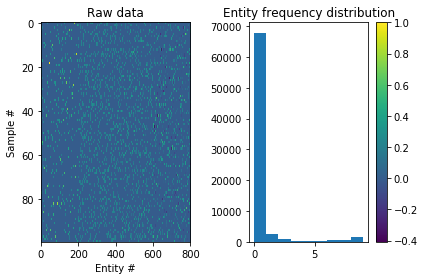

In [4]:
fig = plt.figure()

ax = fig.add_subplot(121)
ax.set_title('Raw data')
cax = ax.imshow(data.T / np.linalg.norm(data,axis=1), aspect='auto')
ax.set_ylabel('Sample #')
ax.set_xlabel('Entity #')

ax = fig.add_subplot(122)
ax.hist(data.flatten(),bins=range(10))
ax.set_title('Entity frequency distribution')

plt.colorbar(cax)
plt.tight_layout()

In [5]:
fr = fringiness(data, 'cosine')

In [6]:
plot = embedding_plot_bokeh(*fr)
show(plot)

In [7]:
histogram = histogram_bokeh(fr[2])
show(histogram)

In [8]:
type(plot)

bokeh.plotting.figure.Figure